In [1982]:
import pandas as pd # type: ignore
from sklearn.datasets import load_iris # type: ignore
iris = load_iris()

In [1983]:
dir(iris)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [1984]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [1985]:
df = pd.DataFrame(iris.data, columns=iris.feature_names)

In [1986]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [1987]:
df['target'] = iris.target

In [1988]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [1989]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [1990]:
df[df.target==2].head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
100,6.3,3.3,6.0,2.5,2
101,5.8,2.7,5.1,1.9,2
102,7.1,3.0,5.9,2.1,2
103,6.3,2.9,5.6,1.8,2
104,6.5,3.0,5.8,2.2,2


In [1991]:
## the lambda function maps each target name to either "setosa", "versicolor" or "virginica"
df['flower_name'] = df.target.apply(lambda x: iris.target_names[x])

In [1992]:
df['flower_name']

0         setosa
1         setosa
2         setosa
3         setosa
4         setosa
         ...    
145    virginica
146    virginica
147    virginica
148    virginica
149    virginica
Name: flower_name, Length: 150, dtype: object

In [1993]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [1994]:
from matplotlib import pyplot as plt
%matplotlib inline

In [1995]:
df0 = df[df.target==0] # setosa
df1 = df[df.target==1] # versicolor
df2 = df[df.target==2] # virginica

In [1996]:
df2.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
100,6.3,3.3,6.0,2.5,2,virginica
101,5.8,2.7,5.1,1.9,2,virginica
102,7.1,3.0,5.9,2.1,2,virginica
103,6.3,2.9,5.6,1.8,2,virginica
104,6.5,3.0,5.8,2.2,2,virginica


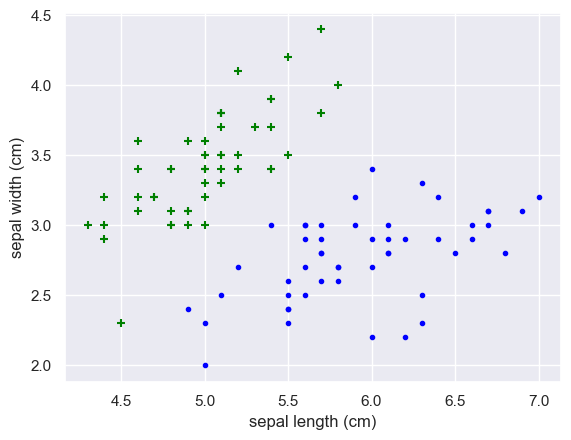

In [1997]:
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')
plt.scatter(df0['sepal length (cm)'], df0['sepal width (cm)'], color='green', marker='+')
plt.scatter(df1['sepal length (cm)'], df1['sepal width (cm)'], color='blue', marker='.')

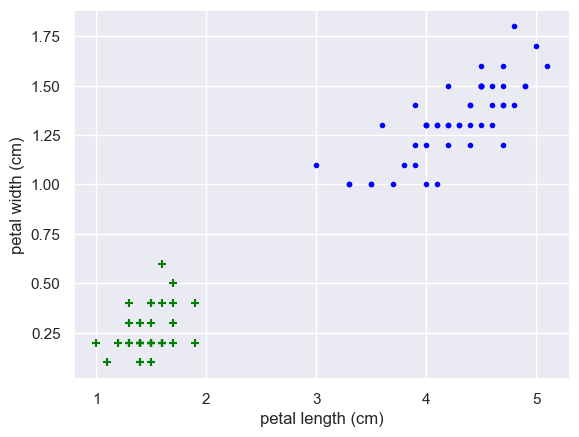

In [1998]:
plt.xlabel('petal length (cm)')
plt.ylabel('petal width (cm)')
plt.scatter(df0['petal length (cm)'], df0['petal width (cm)'], color='green', marker='+')
plt.scatter(df1['petal length (cm)'], df1['petal width (cm)'], color='blue', marker='.')

In [1999]:
from sklearn.model_selection import train_test_split

In [2000]:
X = df.drop(['target', 'flower_name'], axis='columns')
X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [2001]:
y = df.target

In [2002]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [2003]:
len(X_train)

120

In [2004]:
len(X_test)

30

In [2005]:
from sklearn.svm import SVC
model = SVC(kernel='linear')

In [2006]:
model.fit(X_train, y_train)

SVC(kernel='linear')

In [2007]:
model.score(X_test, y_test)

0.9333333333333333

In [2008]:
print(help(model))

Help on SVC in module sklearn.svm._classes object:

class SVC(sklearn.svm._base.BaseSVC)
 |  SVC(*, C=1.0, kernel='rbf', degree=3, gamma='scale', coef0=0.0, shrinking=True, probability=False, tol=0.001, cache_size=200, class_weight=None, verbose=False, max_iter=-1, decision_function_shape='ovr', break_ties=False, random_state=None)
 |  
 |  C-Support Vector Classification.
 |  
 |  The implementation is based on libsvm. The fit time scales at least
 |  quadratically with the number of samples and may be impractical
 |  beyond tens of thousands of samples. For large datasets
 |  consider using :class:`~sklearn.svm.LinearSVC` or
 |  :class:`~sklearn.linear_model.SGDClassifier` instead, possibly after a
 |  :class:`~sklearn.kernel_approximation.Nystroem` transformer or
 |  other :ref:`kernel_approximation`.
 |  
 |  The multiclass support is handled according to a one-vs-one scheme.
 |  
 |  For details on the precise mathematical formulation of the provided
 |  kernel functions and how `

In [2009]:
pred = model.predict(X_test)
# 0 = setosa
# 1 = versicolor
# 2 = virginica
print("model score is:", model.score(X_test, y_test))

model score is: 0.9333333333333333


In [2010]:
print(X_test)

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
96                 5.7               2.9                4.2               1.3
25                 5.0               3.0                1.6               0.2
57                 4.9               2.4                3.3               1.0
141                6.9               3.1                5.1               2.3
118                7.7               2.6                6.9               2.3
42                 4.4               3.2                1.3               0.2
127                6.1               3.0                4.9               1.8
40                 5.0               3.5                1.3               0.3
24                 4.8               3.4                1.9               0.2
82                 5.8               2.7                3.9               1.2
145                6.7               3.0                5.2               2.3
34                 4.9               3.1                1.5     

In [2011]:
from sklearn.metrics import confusion_matrix

mat = confusion_matrix(y_test, pred)

In [2012]:
mat

array([[10,  0,  0],
       [ 0,  9,  2],
       [ 0,  0,  9]])

ColormapRegistry; available colormaps:
'magma', 'inferno', 'plasma', 'viridis', 'cividis', 'twilight', 'twilight_shifted', 'turbo', 'Blues', 'BrBG', 'BuGn', 'BuPu', 'CMRmap', 'GnBu', 'Greens', 'Greys', 'OrRd', 'Oranges', 'PRGn', 'PiYG', 'PuBu', 'PuBuGn', 'PuOr', 'PuRd', 'Purples', 'RdBu', 'RdGy', 'RdPu', 'RdYlBu', 'RdYlGn', 'Reds', 'Spectral', 'Wistia', 'YlGn', 'YlGnBu', 'YlOrBr', 'YlOrRd', 'afmhot', 'autumn', 'binary', 'bone', 'brg', 'bwr', 'cool', 'coolwarm', 'copper', 'cubehelix', 'flag', 'gist_earth', 'gist_gray', 'gist_heat', 'gist_ncar', 'gist_rainbow', 'gist_stern', 'gist_yarg', 'gnuplot', 'gnuplot2', 'gray', 'hot', 'hsv', 'jet', 'nipy_spectral', 'ocean', 'pink', 'prism', 'rainbow', 'seismic', 'spring', 'summer', 'terrain', 'winter', 'Accent', 'Dark2', 'Paired', 'Pastel1', 'Pastel2', 'Set1', 'Set2', 'Set3', 'tab10', 'tab20', 'tab20b', 'tab20c', 'grey', 'gist_grey', 'gist_yerg', 'Grays', 'magma_r', 'inferno_r', 'plasma_r', 'viridis_r', 'cividis_r', 'twilight_r', 'twilight_shifted

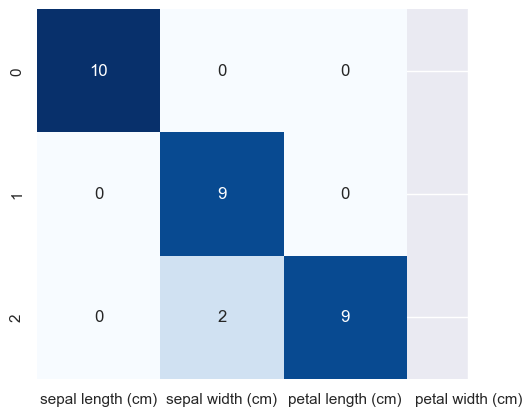

In [2013]:
import seaborn as sns; sns.set()
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False, xticklabels=iris.feature_names, cmap='Blues')
print(plt.colormaps)

In [2014]:
model.score(X_test, y_test)

0.9333333333333333

In [2015]:
import numpy as np
from sklearn.linear_model import LogisticRegression

In [2016]:
X = pd.concat([df0[['sepal length (cm)', 'sepal width (cm)']], df1[['sepal length (cm)', 'sepal width (cm)']]])
y = pd.concat([df0['target'], df1['target']])

In [2017]:
newModel = LogisticRegression()
newModel.fit(X, y)

LogisticRegression()

In [2018]:
h = 0.1
x_min, x_max = X['sepal length (cm)'].min() - 1, X['sepal length (cm)'].max() + 1
y_min, y_max = X['sepal width (cm)'].min() - 1, X['sepal width (cm)'].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

C:\Users\Kylek\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


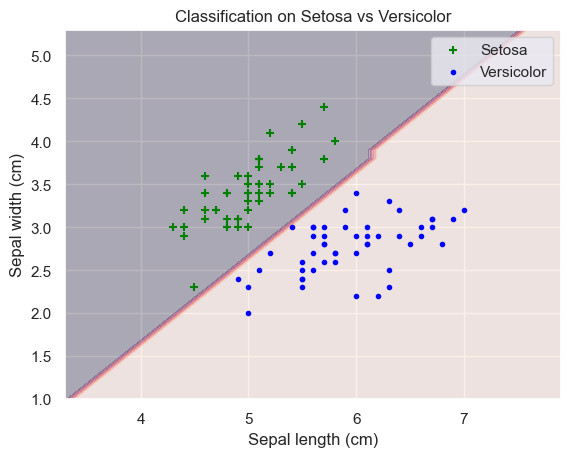

In [2019]:
Z = newModel.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(df0['sepal length (cm)'], df0['sepal width (cm)'], color='green', marker='+', label='Setosa')
plt.scatter(df1['sepal length (cm)'], df1['sepal width (cm)'], color='blue', marker='.', label='Versicolor')

plt.title('Classification on Setosa vs Versicolor')
plt.xlabel('Sepal length (cm)')
plt.ylabel('Sepal width (cm)')
plt.legend()
plt.show()

In [ ]:
## below is a function that uses my support vector machine model ## 
def SVMDeploy(data, labels, inputData):
    model = SVC(kernel='linear')
    model.fit(data, labels)
    prediction = model.predict([inputData])
    print("model predicted:", prediction)

In [2021]:
ARR = np.array([[5.1, 3.5, 1.4, 0.2],  # Setosa
                [7.0, 3.2, 4.7, 1.4],  # Versicolor
                [6.3, 3.3, 6.0, 2.5]]) # Virginica example

y = np.array([0, 1, 2])

flower = np.array(ARR[0])


In [2022]:
SVMDeploy(ARR, y, flower)

model predicted: [0]
